#Dataset

In [ ]:
import pandas as pd
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Características del DataFrame
- CustomerID: id del cliente
- Genre: Género
- Age: Edad
- Annual Income: Ingreso Anual en (K$)
- Spending Score: Puntuación de Gastos (1-100)

In [ ]:
df_copy = df.copy()
df_copy.drop(["CustomerID","Genre"], axis = 1, inplace= True)

df_copy.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [ ]:
df.shape

(200, 5)

In [ ]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


##KMeans

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
X = df_copy.values

In [ ]:
X.min()

1

In [ ]:
X.max()

137

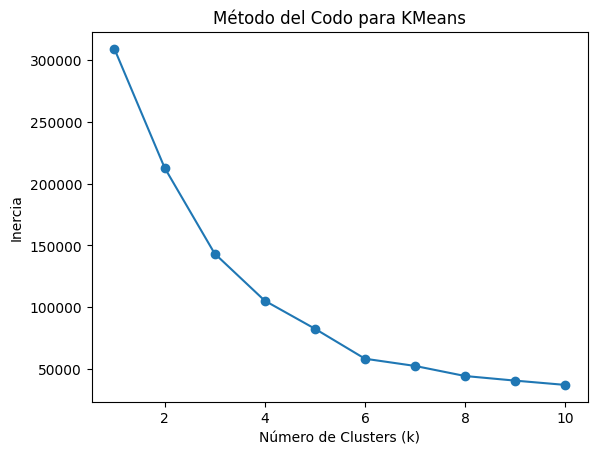

In [ ]:
# Rango de valores de k a probar
k_values = range(1, 11)

# Lista para guardar las inercias (sum of squared distances)
inertias = []

# Calcular la inercia para cada valor de k,
#Se define un rango de valores de k para probar, en este caso de 1 a 10.
#se itera sobre cada valor de k, se crea un modelo KMeans con ese número de clusters,
#se ajusta el modelo a los datos y se guarda la inercia en la lista inertias
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Graficar la curva del codo
plt.plot(k_values, inertias, marker='o')
plt.title('Método del Codo para KMeans')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.show()

In [ ]:
k = 5
# Crear y entrenar el modelo KMeans
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X)

# Obtener las etiquetas de los clusters
labels = kmeans.labels_

df['Cluster'] = labels
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,0
3,4,Female,23,16,77,2
4,5,Female,31,17,40,0


In [ ]:
df["Cluster"].value_counts()

,count
Cluster,
4,53
0,50
1,39
3,34
2,24


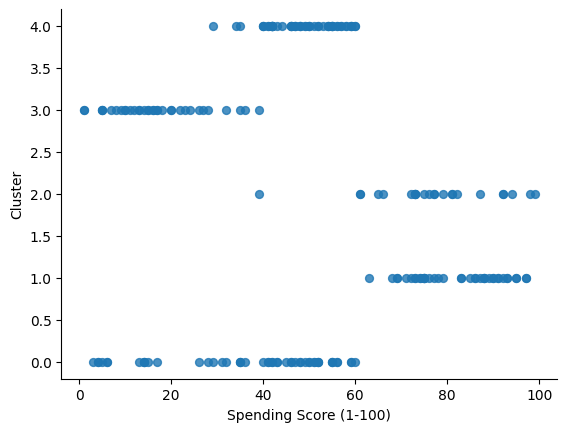

In [ ]:
# @title Spending Score (1-100) vs Cluster

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Spending Score (1-100)', y='Cluster', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

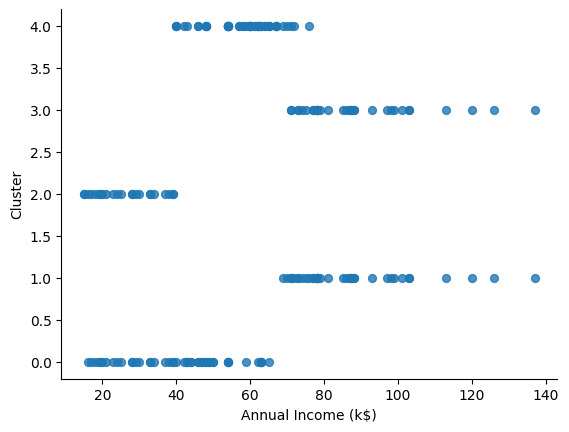

In [ ]:
# @title Annual Income(K$) vs Cluster

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Annual Income (k$)', y='Cluster', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

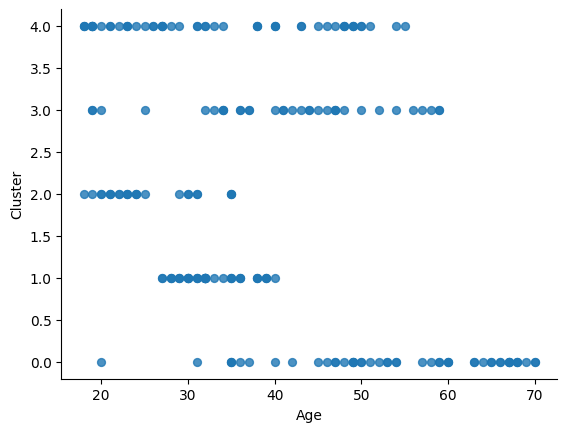

In [ ]:
# @title Age vs Cluster

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Age', y='Cluster', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

##DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
df_copy = df.copy()
df_copy.drop(["CustomerID","Genre","Cluster"], axis = 1, inplace= True)

df_copy.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


El escalado de datos implica cambiar el rango o la magnitud de las variables para que sean más comparables o coherentes. Por ejemplo, si una característica tiene valores en el rango de 1 a 1000 y otra característica tiene valores en el rango de 1 a 5, la característica con valores más grandes tendrá una influencia dominante en el modelo de aprendizaje automático.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled.min()

-1.9100207870073291

In [ ]:
X_scaled.max()

2.9176711658902788

In [ ]:
dbscan = DBSCAN()
dbscan.fit(X_scaled)
df['Cluster'] = dbscan.labels_

In [ ]:
df.sample(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
173,174,Male,36,87,92,4
18,19,Male,52,23,29,-1
87,88,Female,22,57,55,3
159,160,Female,30,78,73,4
4,5,Female,31,17,40,-1


In [ ]:
dbscan.labels_


array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0,  1,
        0, -1, -1,  1,  0, -1,  0, -1,  0,  1, -1,  1,  0, -1,  0, -1,  0,
       -1,  0, -1,  0,  1,  0, -1,  0,  2,  3,  2, -1,  2,  3,  3,  3,  2,
        3,  3,  2,  2,  2,  2,  2,  3,  2,  2,  3,  2,  2,  2,  3,  2,  2,
        3,  3,  2,  2,  2,  2,  2,  3,  2,  2,  3,  2,  2,  2,  2,  2,  3,
        2,  2,  3, -1,  2,  2,  3,  2,  2,  2,  3,  2,  3,  2,  3,  3,  2,
        2,  3,  2,  3,  2,  2,  2,  2,  2,  3,  2,  3,  3,  3,  2,  2,  2,
        2,  3,  2, -1,  4, -1,  4, -1,  4, -1,  4,  5,  4,  3,  4, -1,  4,
        5,  4, -1,  4, -1,  4, -1,  4, -1,  4, -1,  4, -1,  4,  5,  4,  5,
        4,  5,  4, -1,  4, -1,  4, -1,  4, -1,  4, -1,  4,  5,  4, -1, -1,
        5,  4, -1,  4, -1,  4, -1,  4, -1,  4, -1,  4, -1,  4, -1,  4, -1,
       -1, -1,  4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [ ]:
df["Cluster"].value_counts().sort_index()

,count
Cluster,
-1,60
0,17
1,5
2,51
3,28
4,32
5,7


In [ ]:
dbscan.core_sample_indices_

array([  1,   3,   5,  13,  15,  21,  23,  25,  28,  29,  31,  35,  42,
        46,  47,  48,  49,  50,  52,  54,  55,  56,  57,  58,  59,  60,
        61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,
        74,  75,  76,  77,  78,  79,  80,  82,  83,  84,  85,  86,  87,
        89,  90,  91,  92,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 125, 129, 133, 135, 137, 139, 141, 143, 145, 147,
       149, 150, 151, 153, 154, 155, 157, 159, 161, 163, 166, 167, 171,
       173, 175, 179, 181, 183])

In [ ]:
dbscan.fit_predict([[0,0,0]])

array([-1])

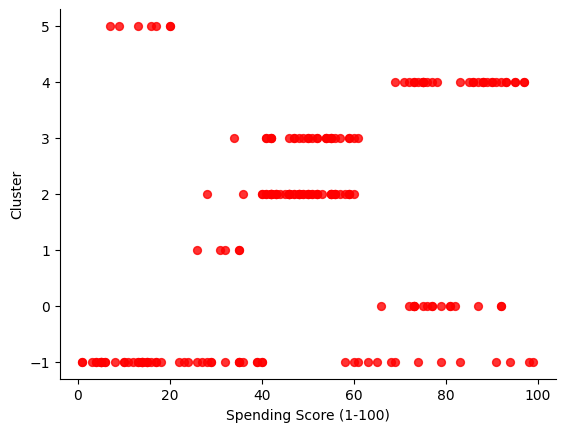

In [ ]:
# @title Spending Score (1-100) vs Cluster

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Spending Score (1-100)', y='Cluster', s=32, alpha=.8, color="red")
plt.gca().spines[['top', 'right',]].set_visible(False)

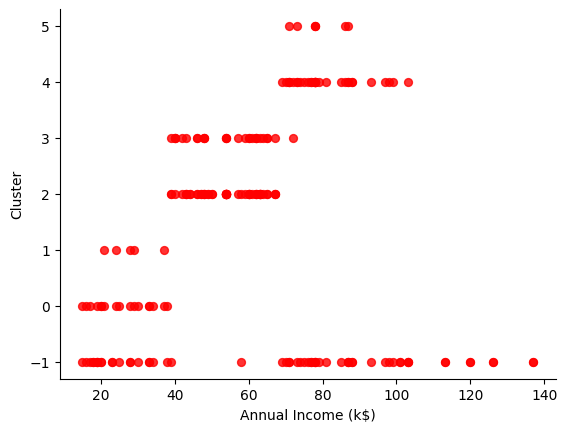

In [ ]:
# @title Annual Income(K$) vs Cluster

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Annual Income (k$)', y='Cluster', s=32, alpha=.8, color="red")
plt.gca().spines[['top', 'right',]].set_visible(False)

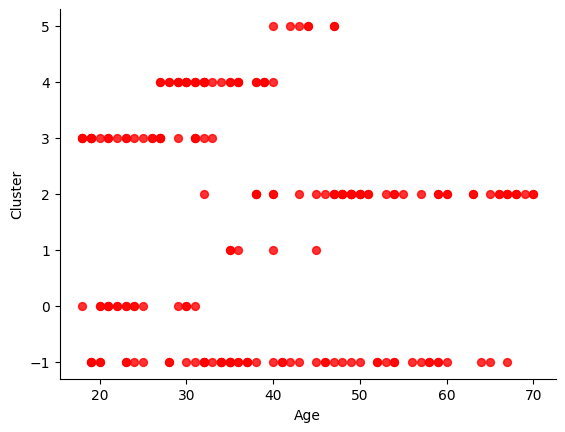

In [ ]:
# @title Age vs Cluster

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Age', y='Cluster', s=32, alpha=.8, color="red")
plt.gca().spines[['top', 'right',]].set_visible(False)

Tarea
- cargar dataset iris como dataframe
- hacer agrupamiento con DBSCAN
- agregar columna de etiqueta de grupo y visualizar

In [ ]:
from sklearn.datasets import load_iris
# Load the Iris dataset
iris = load_iris()

# Create a DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [ ]:
X = df.values[:, 1:]
#X = StandardScaler().fit_transform(X)
dbscan = DBSCAN()
dbscan.fit(X)
df['Cluster'] = dbscan.labels_

In [ ]:
print(dbscan.labels_)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1 -1 -1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [ ]:
clusterNoise = df[df["Cluster"] == -1]
cluster0 = df[df["Cluster"] == 0]
cluster1 = df[df["Cluster"] == 1]

In [ ]:
clusterNoise

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
15,5.7,4.4,1.5,0.4,-1
41,4.5,2.3,1.3,0.3,-1
60,5.0,2.0,3.5,1.0,-1
109,7.2,3.6,6.1,2.5,-1
117,7.7,3.8,6.7,2.2,-1
118,7.7,2.6,6.9,2.3,-1
131,7.9,3.8,6.4,2.0,-1
